In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('steps_train.txt', skiprows=1,nrows=110, header=None, usecols=[1,2])

In [3]:
import matplotlib.pyplot as plt
# Draw Plot Function
def plot_df(df, x, y, title="TimeSeries", xlabel='X Position', ylabel='Y Position', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

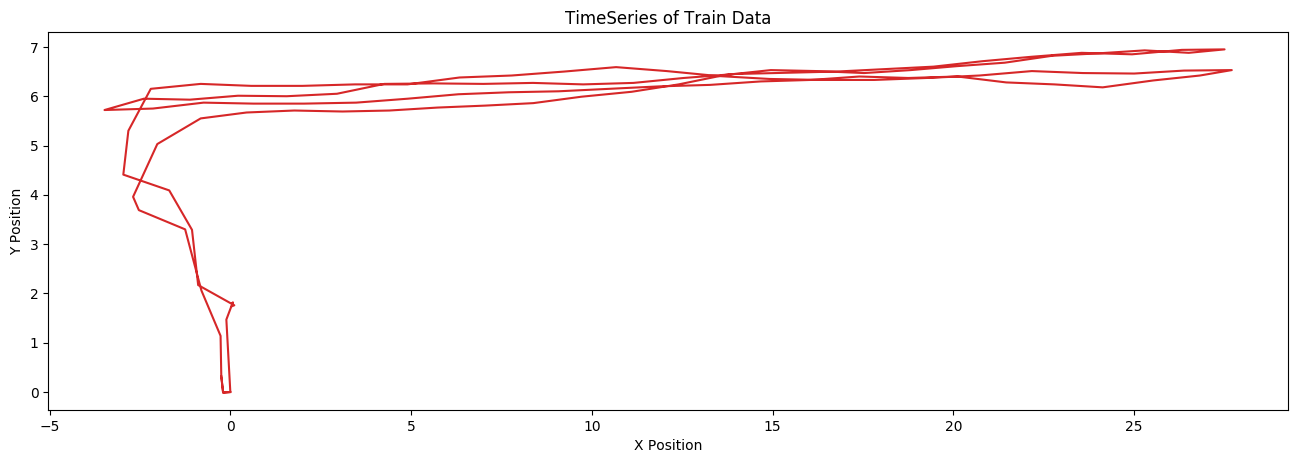

In [4]:
plot_df(df, x=df[1], y=df[2], title='TimeSeries of Train Data')

## Vector AutoRegression (VAR) score

In [51]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [52]:
L = 20
N = len(df[1])
print(f"N={N} and lag={L}")

N=110 and lag=20


In [58]:
pred = []
for i in range(N-L+1):
    df_window = df[i:L+i]
    model = VAR(df_window)
    model_fit = model.fit()
    pred.append(model_fit.forecast(df_window.values, 1)[0])

In [59]:
len(pred)

91

In [60]:
len(df[19:])

91

In [61]:
pred

[array([14.04246542,  6.14358296]),
 array([15.2908506 ,  6.39266549]),
 array([16.51647153,  6.52270588]),
 array([17.66339311,  6.52084361]),
 array([18.81062789,  6.51105196]),
 array([19.98651733,  6.54566372]),
 array([21.34990504,  6.65350363]),
 array([22.70414126,  6.75544232]),
 array([24.03916397,  6.85996882]),
 array([25.31237909,  6.94832496]),
 array([26.57307241,  7.01816203]),
 array([27.79498302,  6.98428878]),
 array([28.687156  ,  7.02736819]),
 array([27.04291092,  6.98227208]),
 array([25.38717407,  6.87781225]),
 array([24.18301792,  6.89352577]),
 array([22.6690994 ,  6.80659658]),
 array([21.2699704 ,  6.72366023]),
 array([20.06710951,  6.64914112]),
 array([18.85128258,  6.60339197]),
 array([17.50783765,  6.5319169 ]),
 array([14.13506171,  6.39652129]),
 array([11.74035094,  6.29577067]),
 array([10.04860333,  6.22047871]),
 array([8.06730257, 6.16045526]),
 array([6.35973114, 6.13949704]),
 array([5.43281624, 6.14747856]),
 array([4.67843189, 6.21070376]),


In [16]:
np.linalg.norm(pred[1]-df[19:], ord=2)

99.58491339479414

In [29]:
scores=[]
for j in range(len(pred)):
    predicted_distance = (np.linalg.norm(pred[j], ord=2))
    actual_distance = (np.linalg.norm(df[j+19:], ord=2))    
    scores.append(abs(predicted_distance-actual_distance))
    

In [30]:
len(scores)

91

In [31]:
import plotly.graph_objects as go

In [32]:
score_data = go.Scatter(x=list(range(len(scores))), y=scores)
layout = go.Layout()
fig=go.Figure(data=[score_data], layout=layout)
fig.show()

In [38]:
import pandas as pd

In [41]:
pred=np.array(pred)

In [63]:
pred_df = pd.DataFrame(pred)

In [65]:
pred_data = go.Scatter(x=pred_df[0],y=pred_df[1])

In [67]:
fig = go.Figure(data=[pred_data])
fig.show()

## VAR Score Calculator function

In [33]:
def var_score_calculate(df, lag=20):
    L = lag
    N = len(df[1])
    pred = []
    for i in range(N-L+1):
        df_window = df[i:L+i]
        model = VAR(df_window)
        model_fit = model.fit()
        pred.append(model_fit.forecast(df_window.values, 1))
    scores=[]
    for j in range(len(pred)):
        predicted_distance = (np.linalg.norm(pred[j], ord=2))
        actual_distance = (np.linalg.norm(df[j+19:], ord=2))    
        scores.append(abs(predicted_distance-actual_distance))
    
    return scores

In [34]:
df = pd.read_csv('steps_train.txt', skiprows=1,nrows=110, header=None, usecols=[1,2])

In [35]:
var_score_calculate(df, 20)

[136.43267683092492,
 134.5618392648549,
 132.62920166479944,
 130.67665596729358,
 128.57612723907363,
 126.27085289305803,
 123.58610443597955,
 120.71921202641019,
 117.65585250759561,
 114.42136530281962,
 110.95617154227226,
 107.28673148865283,
 103.6428424715123,
 102.22035286026778,
 100.99242037920112,
 99.51140025335542,
 98.56248724375926,
 97.7136615446597,
 96.87865456053848,
 96.24518880467848,
 95.92653170946654,
 97.67977971531144,
 98.83037797444175,
 99.45977609879651,
 100.40769665855215,
 101.13782255399211,
 101.31642355378985,
 101.3977766379731,
 101.98357357435258,
 102.65346916331026,
 102.69344497096027,
 102.52173263226433,
 102.1666877878485,
 101.63195958440032,
 100.96925370270353,
 102.26768593942155,
 102.59613869871757,
 102.51368777240923,
 101.84423134774107,
 100.8831070115952,
 99.9705453840479,
 99.09501846945889,
 97.64381244529127,
 95.62119081212067,
 93.6477309275985,
 91.65563707663276,
 89.33104985689624,
 87.33004738477189,
 84.7205914315235